In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS #导入模块worldcloud
from PIL import Image #导入模块PIL(Python Imaging Library)图像处理库
import numpy as np #导入模块numpy，多维数组
import matplotlib
import jieba

In [2]:
data=open(r'D:\video_data.csv',encoding='utf-8')
video_data = pd.read_csv(data)

In [3]:
video_data.head()#查看前五行

,日期,标题,UP,BV,mid,粉丝,播放,弹幕,评论,点赞,硬币,收藏,转发,排名,标签
0,2020/8/6 17:15,《龙 王 赘 婿》连续剧 第44集已更新！【梦幻真龙王篇】2020.8.30！歪嘴战神！,半藏同学,BV1GT4y177Vx,491168990,145058,19495503,280753,35820,605202,165130,519590,374451,2,"搞笑视频,搞笑,战神,沙雕视频,萧炎,大电影,龙王,修罗,歪嘴,歪嘴战神"
1,2020/8/7 12:00,爽,中国BOY超级大猩猩,BV1wt4y1Q7cJ,562197,6335163,8741250,368924,27500,112662,247281,220,770,10,"欢天喜地好哥们,阴阳怪气,老番茄,花少北,某幻君,lex,lexburner,中国BOY超级大猩猩"
2,2020/8/13 17:35,歪嘴战神来了！各位好，我是“龙王”管云鹏！【最后有彩蛋】,演员管云鹏,BV1Ca4y1J7eT,310702549,779904,8665518,61190,50462,644327,201732,74398,62356,4,"沙雕日常,搞笑,龙王,沙雕,生活,管云鹏,歪嘴,最强赘婿,赘婿,歪嘴战神"
3,2020/8/2 9:00,我父亲因为支持川普，被人打了…,-句芒-,BV15V411z7Jk,94476885,10109,6754759,25237,6707,339108,28424,117815,74828,7,"搞笑视频,沙雕视频,川建国,美国总统,美国,川普"
4,2020/8/21 12:00,戏 精,花少北丶,BV1M54y1e7KW,2206456,4518359,6094264,364677,24501,100220,198901,215,695,5,"欢天喜地好哥们,阴阳怪气,花少北,老番茄,lex,lexburner,某幻君,中国boy,真人秀"


In [4]:
video_data.info()#视频数据的信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227066 entries, 0 to 227065
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   日期      227066 non-null  object
 1   标题      227066 non-null  object
 2   UP      227063 non-null  object
 3   BV      227066 non-null  object
 4   mid     227066 non-null  int64 
 5   粉丝      227066 non-null  int64 
 6   播放      227066 non-null  object
 7   弹幕      227066 non-null  object
 8   评论      227066 non-null  object
 9   点赞      227066 non-null  object
 10  硬币      227066 non-null  object
 11  收藏      227066 non-null  object
 12  转发      227066 non-null  object
 13  排名      227066 non-null  object
 14  标签      227061 non-null  object
dtypes: int64(2), object(13)
memory usage: 26.0+ MB


In [5]:
video_data['播放'].replace('None', 0,inplace = True)#将数据中标记为None的数据替换成0，方便数据处理
video_data['弹幕'].replace('None', 0,inplace = True)
video_data['评论'].replace('None', 0,inplace = True)
video_data['点赞'].replace('None', 0,inplace = True)
video_data['硬币'].replace('None', 0,inplace = True)
video_data['收藏'].replace('None', 0,inplace = True)
video_data['转发'].replace('None', 0,inplace = True)
video_data['排名'].replace('None', 0,inplace = True)
video_data['播放'] = video_data['播放'].astype("int64")#将数字的格式转换成int格式，用于数据处理
video_data['弹幕'] = video_data['弹幕'].astype("int")
video_data['评论'] = video_data['评论'].astype("int")
video_data['点赞'] = video_data['点赞'].astype("int")
video_data['硬币'] = video_data['硬币'].astype("int")
video_data['收藏'] = video_data['收藏'].astype("int")
video_data['转发'] = video_data['转发'].astype("int")
video_data['排名'] = video_data['排名'].astype("int")

In [6]:
video_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227066 entries, 0 to 227065
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   日期      227066 non-null  object
 1   标题      227066 non-null  object
 2   UP      227063 non-null  object
 3   BV      227066 non-null  object
 4   mid     227066 non-null  int64 
 5   粉丝      227066 non-null  int64 
 6   播放      227066 non-null  int64 
 7   弹幕      227066 non-null  int32 
 8   评论      227066 non-null  int32 
 9   点赞      227066 non-null  int32 
 10  硬币      227066 non-null  int32 
 11  收藏      227066 non-null  int32 
 12  转发      227066 non-null  int32 
 13  排名      227066 non-null  int32 
 14  标签      227061 non-null  object
dtypes: int32(7), int64(3), object(5)
memory usage: 19.9+ MB


In [7]:
video_data['标题'] = video_data['标题'].str.replace(r'[^\u4e00-\u9fa5]','')#只保留中文

In [8]:
video_data['标题'].fillna(' ',inplace=True) #将空值替换成空格
video_data['标题'] = video_data['标题'].apply(lambda x:' '.join(jieba.cut(x)))#将句子分割成一个个词语
video_data['标题'].head()

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\12590\AppData\Local\Temp\jieba.cache
Loading model cost 0.619 seconds.
Prefix dict has been built successfully.


0    龙王 赘婿 连续剧 第集 已 更新 梦幻 真 龙王 篇 歪嘴 战神
1                                    爽
2    歪嘴 战神 来 了 各位 好 我 是 龙王 管云鹏 最后 有 彩蛋
3                我 父亲 因为 支持 川普 被 人 打 了
4                                   戏精
Name: 标题, dtype: object

In [9]:
#同理处理标签
video_data['标签'] = video_data['标签'].str.replace(',','')
video_data['标签'].fillna(' ',inplace=True)
video_data['标签'] = video_data['标签'].apply(lambda x:' '.join(jieba.cut(x)))
video_data['标签'].head()

0             搞笑 视频 搞笑 战神 沙雕 视频 萧炎 大 电影 龙王 修罗 歪嘴 歪嘴 战神
1    欢天喜地 好 哥们 阴阳怪气 老 番茄 花少北 某 幻君 lexlexburner 中国 B...
2              沙雕 日常 搞笑 龙王 沙雕 生活 管云鹏 歪嘴 最强 赘婿 赘婿 歪嘴 战神
3                         搞笑 视频 沙雕 视频 川 建国 美国 总统 美国 川普
4    欢天喜地 好 哥们 阴阳怪气 花少北 老 番茄 lexlexburner 某幻君 中国 bo...
Name: 标签, dtype: object

In [10]:
video_data.日期 = pd.to_datetime(video_data.日期.str.findall(r'\d{4}.+').str.get(0)) #将时间进行解析，转化为标准格式
video_data['weekday'] = video_data.日期.dt.weekday #获取星期几
video_data['hour'] = video_data.日期.dt.hour #获取小时

In [11]:
#用于计算三连、弹幕、评论率
def new_round(_float, _len):
    if isinstance(_float, float):
        if str(_float)[::-1].find('.') <= _len:
            return(_float)
        if str(_float)[-1] == '5':
            return(round(float(str(_float)[:-1]+'6'), _len))
        else:
            return(round(_float, _len))
    else:
        return(round(_float, _len))

In [12]:
video_data['点赞率']=new_round(video_data.点赞/video_data.播放*100,0)
video_data['硬币率']=new_round(video_data.硬币/video_data.播放*100,0)
video_data['收藏率']=new_round(video_data.收藏/video_data.播放*100,0)
video_data['转发率']=new_round(video_data.转发/video_data.播放*100,0)
video_data['弹幕率']=new_round(video_data.弹幕/video_data.播放*100,0)
video_data['评论率']=new_round(video_data.评论/video_data.播放*100,1)

In [13]:
video_data.head()

,日期,标题,UP,BV,mid,粉丝,播放,弹幕,评论,点赞,...,排名,标签,weekday,hour,点赞率,硬币率,收藏率,转发率,弹幕率,评论率
0,2020-08-06 17:15:00,龙王 赘婿 连续剧 第集 已 更新 梦幻 真 龙王 篇 歪嘴 战神,半藏同学,BV1GT4y177Vx,491168990,145058,19495503,280753,35820,605202,...,2,搞笑 视频 搞笑 战神 沙雕 视频 萧炎 大 电影 龙王 修罗 歪嘴 歪嘴 战神,3,17,3.0,1.0,3.0,2.0,1.0,0.2
1,2020-08-07 12:00:00,爽,中国BOY超级大猩猩,BV1wt4y1Q7cJ,562197,6335163,8741250,368924,27500,112662,...,10,欢天喜地 好 哥们 阴阳怪气 老 番茄 花少北 某 幻君 lexlexburner 中国 B...,4,12,1.0,3.0,0.0,0.0,4.0,0.3
2,2020-08-13 17:35:00,歪嘴 战神 来 了 各位 好 我 是 龙王 管云鹏 最后 有 彩蛋,演员管云鹏,BV1Ca4y1J7eT,310702549,779904,8665518,61190,50462,644327,...,4,沙雕 日常 搞笑 龙王 沙雕 生活 管云鹏 歪嘴 最强 赘婿 赘婿 歪嘴 战神,3,17,7.0,2.0,1.0,1.0,1.0,0.6
3,2020-08-02 09:00:00,我 父亲 因为 支持 川普 被 人 打 了,-句芒-,BV15V411z7Jk,94476885,10109,6754759,25237,6707,339108,...,7,搞笑 视频 沙雕 视频 川 建国 美国 总统 美国 川普,6,9,5.0,0.0,2.0,1.0,0.0,0.1
4,2020-08-21 12:00:00,戏精,花少北丶,BV1M54y1e7KW,2206456,4518359,6094264,364677,24501,100220,...,5,欢天喜地 好 哥们 阴阳怪气 花少北 老 番茄 lexlexburner 某幻君 中国 bo...,4,12,2.0,3.0,0.0,0.0,6.0,0.4


In [14]:
print('共有{}位UP，分别是'.format(len(video_data['UP'].unique())))#unique是将重复的去除
video_data['UP'].unique()

共有88350位UP，分别是


array(['半藏同学', '中国BOY超级大猩猩', '演员管云鹏', ..., '申明大益', '媒赛diss', '恰柠檬的竹秋十七'],
      dtype=object)

In [15]:
# 计算每个播放量区间的视频数量
data_length = len(video_data)
data_length_rate0 = len(video_data[video_data['播放']<10000])
data_length_rate1 = len(video_data[(video_data['播放']>=10000) & (video_data['播放']<100000)])
data_length_rate2 = len(video_data[(video_data['播放']>=100000) & (video_data['播放']<500000)])
data_length_rate3 = len(video_data[(video_data['播放']>=500000) & (video_data['播放']<1000000)])
data_length_rate4 = len(video_data[video_data['播放']>1000000])

In [16]:
video_rate = [data_length_rate0,data_length_rate1,data_length_rate2,data_length_rate3,data_length_rate4]
data_view = ['[0,9999]','[10000,99999]','[100000,499999]','[500000,999999]','[1000000,....]']
video_rate

[213115, 10731, 2436, 464, 320]

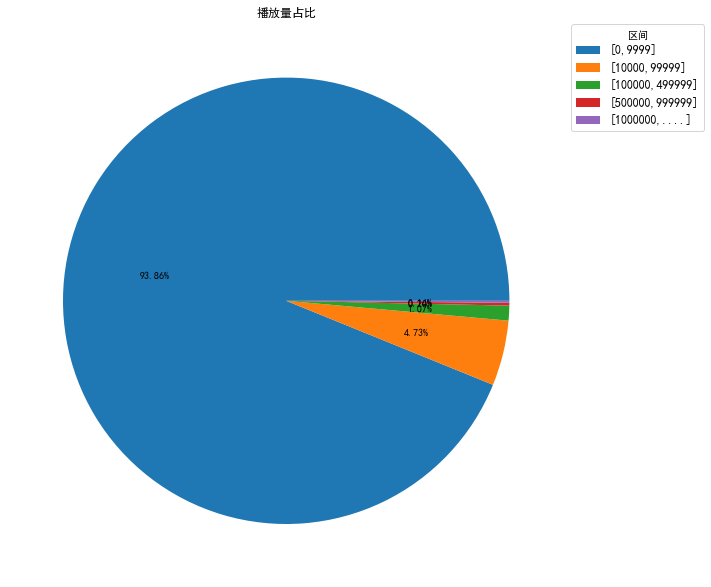

In [17]:
# 画出饼图
plt.rcParams['font.sans-serif']=['SimHei'] # 中文不乱码
plt.rcParams['axes.unicode_minus'] = False
fig = plt.figure(figsize=(10,15))
plt.pie(video_rate,autopct='%1.2f%%') #画饼图（数据，数据对应的标签，百分数保留两位小数点）
plt.legend(
           data_view,
           fontsize=12,
           title="区间",
           loc="center left",
           bbox_to_anchor=(1, 0.9))
plt.title("播放量占比")
plt.show() 

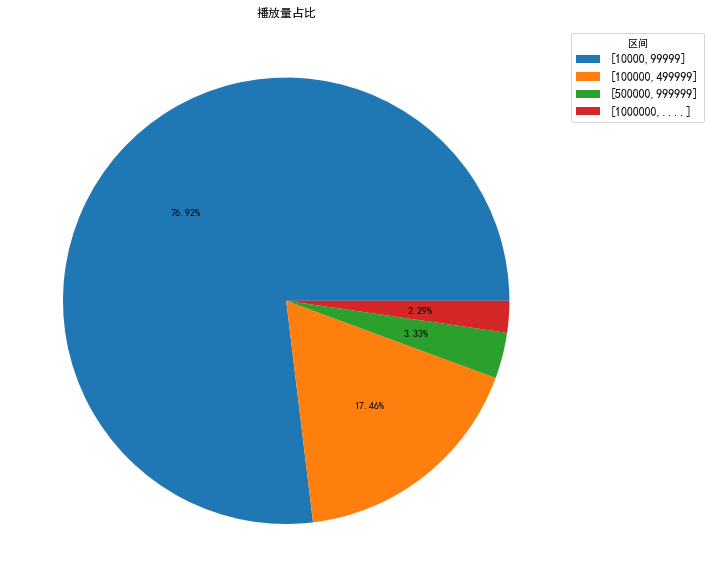

In [18]:
video_rate = [data_length_rate1,data_length_rate2,data_length_rate3,data_length_rate4]
data_view = ['[10000,99999]','[100000,499999]','[500000,999999]','[1000000,....]']
fig = plt.figure(figsize=(10,15))
plt.pie(video_rate,autopct='%1.2f%%') #画饼图（数据，数据对应的标签，百分数保留两位小数点）
plt.legend(
           data_view,
           fontsize=12,
           title="区间",
           loc="center left",
           bbox_to_anchor=(1, 0.9))
plt.title("播放量占比")
plt.show() 

In [19]:
#统计播放量排名前20的UP
top_20=video_data.sort_values(by=['播放'],ascending=False)[:20]
top_20['UP'].value_counts()

敬汉卿             3
演员管云鹏           2
小潮院长            2
长樱路的呆呆          1
Lillesort       1
哆魔熊             1
陈师姬             1
半藏同学            1
某幻君             1
中国BOY超级大猩猩      1
-句芒-            1
17岁反派里的持枪Boy    1
摸鱼府的大少爷         1
姜峰真的苟           1
花少北丶            1
甜鹿兒             1
Name: UP, dtype: int64

In [20]:
# 前20的具体数据
top_20[['UP','播放','粉丝']]

,UP,播放,粉丝
0,半藏同学,19495503,145058
1,中国BOY超级大猩猩,8741250,6335163
2,演员管云鹏,8665518,779904
3,-句芒-,6754759,10109
4,花少北丶,6094264,4518359
5,Lillesort,5866319,11597
6,摸鱼府的大少爷,5857720,37399
7,小潮院长,5234583,4333454
8,哆魔熊,5153837,9868
9,某幻君,5120471,6032236


In [21]:
#根据UP主分组，对每个UP八月的总播放量进行排序
print(video_data.groupby('UP')['播放'].sum().sort_values(ascending=False)[:20])
top_1 = video_data[video_data['UP']=='大霓奈']
print(top_1['UP'].value_counts())
top_1 = video_data[video_data['UP']=='陈师姬']
print(top_1['UP'].value_counts())
top_1 = video_data[video_data['UP']=='17岁反派里的持枪Boy']
print(top_1['UP'].value_counts())

UP
大霓奈             53882348
陈师姬             39269242
17岁反派里的持枪Boy    33207324
敬汉卿             27576411
日禾亻尔            26892763
朱一旦的枯燥生活        26069983
半藏同学            19621333
请问你有我骚么         19116003
邻居家的小猫咪哇        15537490
演员管云鹏           15231938
水杯w             15028324
悠哉的神樂           14193174
摆货小天才           13689628
长樱路的呆呆          13572006
星晴dj            13136501
中国BOY超级大猩猩      12074277
RY热阳            11638531
摸鱼府的大少爷         11513348
吾系哲学家           11284204
xiao小柴哥         10957091
Name: 播放, dtype: int64
大霓奈    154
Name: UP, dtype: int64
陈师姬    528
Name: UP, dtype: int64
17岁反派里的持枪Boy    181
Name: UP, dtype: int64


In [22]:
# 对每个UP主的弹幕数综合进行排序
video_data.groupby('UP')['弹幕'].sum().sort_values(ascending=False)[:20]

UP
中国BOY超级大猩猩    419484
花少北丶          364677
某幻君           309813
鹿歧leechee     284048
半藏同学          281857
敬汉卿           280161
徐大虾咯          152183
达达达布溜-        132296
土味角虫          125697
朱一旦的枯燥生活      124377
小潮院长          116380
演员管云鹏         110660
贤宝宝Baby        95306
东尼ookii        93374
不想练腿的古龙同学      88506
甘子七            88047
鹰目大人           85959
夕寒君            84353
扒妹儿无聊的朋友们      81227
虎烂大王           76272
Name: 弹幕, dtype: int32

In [23]:
# 对每个UP主的评论数综合进行排序
video_data.groupby('UP')['评论'].sum().sort_values(ascending=False)[:20]

UP
演员管云鹏           83214
敬汉卿             83026
大霓奈             76454
朱一旦的枯燥生活        53564
17岁反派里的持枪Boy    36930
半藏同学            36106
中国BOY超级大猩猩      34045
粗犷毛线君           33778
陈师姬             30873
毕导THU           24814
花少北丶            24501
日禾亻尔            22381
某幻君             21804
阿漫啊阿漫           20092
俺是小熊            19937
徐大虾咯            19865
小潮院长            18732
鹿歧leechee       18403
盖里老哥            17977
姚姚不是P30         17955
Name: 评论, dtype: int32

In [24]:
# 对八月份每个UP主发的视频数量进行统计
video_data['UP'].value_counts()[:20]

老年人诱捕大队队长       6932
老土带你看           1175
陈师姬              528
日禾亻尔             498
四只小猪啊啊啊          479
#NAME?           365
烂活传说             320
LAN聪             290
可乐微视频            286
请问你有我骚么          285
卸甲山之实验           246
长樱路的呆呆           227
沙雕管理者            209
小文子12            196
阿吉房车旅游           186
17岁反派里的持枪Boy     181
拖延症是无药可救的        180
进口卡哇伊            157
大霓奈              154
兴致索然的青年          151
Name: UP, dtype: int64

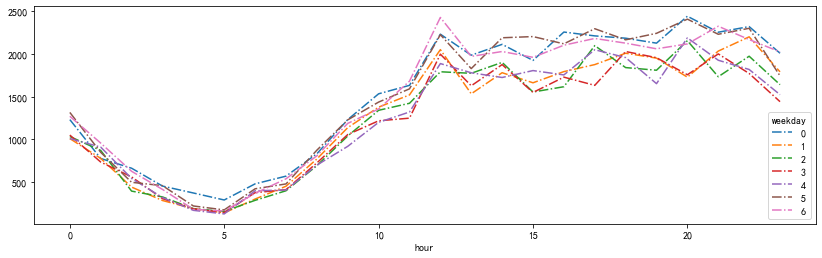

In [25]:
# 对每周不同时间段发布的视频数量进行统计
fig1, ax1=plt.subplots(figsize=(14,4))
df=video_data.groupby(['hour', 'weekday']).count()['mid'].unstack()
df.plot(ax=ax1, style='-.')
plt.show()

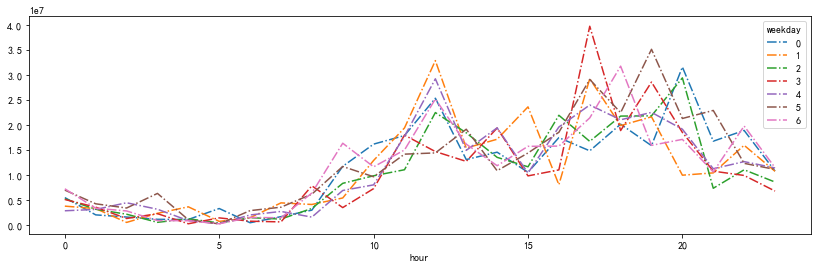

In [26]:
# 对每周不同时间的视频播放量进行统计
fig2,ax2=plt.subplots(figsize=(14,4))
df=video_data.groupby(['hour','weekday']).sum()['播放'].unstack()
df.plot(ax=ax2,style='-.')
plt.show()

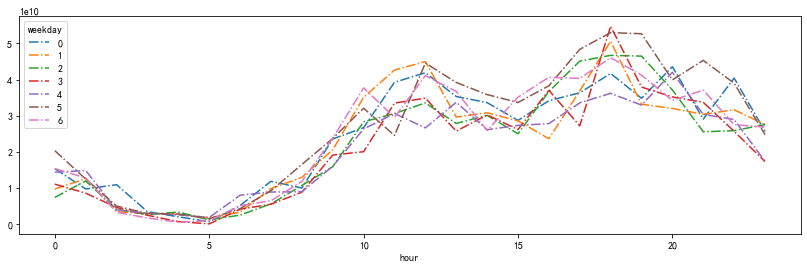

In [27]:
# 对每周不同时间段发布的视频播放量大于10000的视频数量进行汇总
view_1 = video_data[video_data['播放']>10000]
fig2,ax2=plt.subplots(figsize=(14,4))
df=view_1.groupby(['hour','weekday']).sum()['mid'].unstack()
df.plot(ax=ax2,style='-.')
plt.show()

In [28]:
view_2 = video_data[video_data['播放']>100000]
view_3 = video_data[video_data['播放']>1000000]

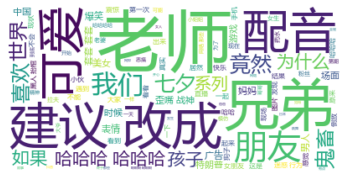

In [29]:
matplotlib.rcParams['font.sans-serif'] = ['KaiTi']#作图的中文
matplotlib.rcParams['font.serif'] = ['KaiTi']#作图的中文
infile = open("D:/stopwords.txt",encoding='utf-8')
stopwords_lst = infile.readlines()
STOPWORDS = [x.strip() for x in stopwords_lst] #去除头尾字符
stopwords = set(STOPWORDS) #设置停用词

def ciyun(texts,mid='all'): #支持指定UP主
    if mid == 'all':
        text = ' '.join(texts)
    else:
        text = ' '.join(texts[video_data['mid']==mid])

    wc = WordCloud(font_path="msyh.ttc", background_color='white', max_words=100, stopwords=stopwords, max_font_size=80, random_state=42, margin=3) #配置词云参数
    wc.generate(text) #生成词云
    plt.imshow(wc,interpolation="bilinear")#作图
    plt.axis("off") #不显示坐标轴

ciyun(video_data['标题'])

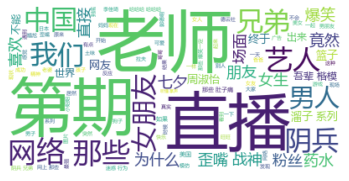

In [30]:
ciyun(view_1['标题'])

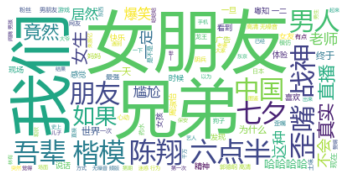

In [31]:
ciyun(view_2['标题'])

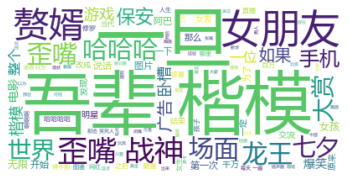

In [32]:
ciyun(view_3['标题'])

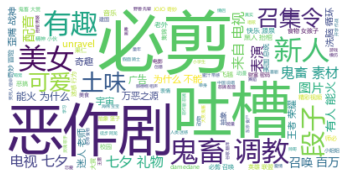

In [33]:
ciyun(video_data['标签'])

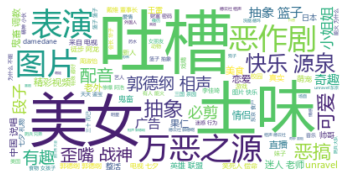

In [34]:
ciyun(view_1['标签'])

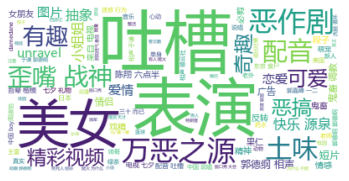

In [35]:
ciyun(view_2['标签'])

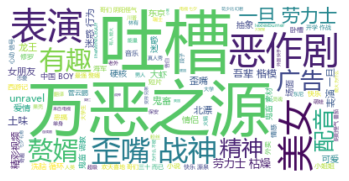

In [36]:
ciyun(view_3['标签'])

In [37]:
# 统计标题中包含老师的视频数和播放量综合
video_teacher = video_data[video_data['标题'].str.contains("老师")]
teacher = [len(video_teacher),video_teacher['播放'].sum()]
teacher

[3022, 16610756]

In [38]:
video_bro = video_data[video_data['标题'].str.contains("兄弟")]
brother = [len(video_bro),video_bro['播放'].sum()]
brother

[1897, 25270292]

In [39]:
video_girlfriend = video_data[video_data['标题'].str.contains("女朋友")]
girlfriend = [len(video_girlfriend),video_girlfriend['播放'].sum()]
girlfriend

[830, 28265224]

In [40]:
# 包含女朋友的标题中包含兄弟的视频信息
fun = video_girlfriend[video_girlfriend['标题'].str.contains("兄弟")].drop_duplicates()
print(len(fun))
print(fun)

12
                        日期                                           标题  \
4685   2020-08-25 20:13:00               七夕节 给 好 兄弟 女朋友 送 玫瑰 是 一种 什么 体验   
4977   2020-08-26 13:11:00            给 好 兄弟 一千块 让 他 做 我 两 小时 女朋友 难忘 七夕   
5403   2020-08-15 14:54:00                          兄弟 你 这 是 挡泥板 还是 女朋友   
9440   2020-08-19 08:17:00                    兄弟 看看 你 女朋友 还 是不是 原来 的 那个   
21376  2020-08-11 15:34:00                          第一次 带 女朋友 去 兄弟 家 竟然   
23731  2020-08-02 01:44:00              熟肉 的 复仇 兄弟 我 好像 爱上你 的 女朋友 了 恶作剧   
34774  2020-08-05 21:34:00                             第一次 带 女朋友 到 兄弟 家   
106080 2020-08-24 22:59:00               我 送 女朋友 的 七夕 礼物 兄弟 们 我 做 的 对 吗   
142272 2020-08-29 16:00:00  厦门 的 兄弟 看 过来 还愁 不知 去 哪 约会 周末 带上 女朋友 快去 打卡 吧   
190171 2020-08-12 11:49:00                      如果 跟 你 合租 的 兄弟 带 女朋友 回来   
196624 2020-08-12 11:49:00                      如果 跟 你 合租 的 兄弟 带 女朋友 回来   
202592 2020-08-31 17:05:00             兄弟 们 听 我 的 这样 跟 女朋友 一起 吃饭 更 浪漫 哦   

                    U

In [41]:
video_yidan = video_data[video_data['标题'].str.contains("一旦")]
yidan = [len(video_yidan),video_yidan['播放'].sum()]
yidan

[89, 28302099]

In [42]:
video_wubei = video_data[video_data['标题'].str.contains("吾辈")]
wubei = [len(video_wubei),video_wubei['播放'].sum()]
wubei

[318, 35563900]

In [43]:
video_waizui = video_data[video_data['标题'].str.contains("歪嘴")]
waizui = [len(video_waizui),video_waizui['播放'].sum()]
waizui

[1810, 70787655]

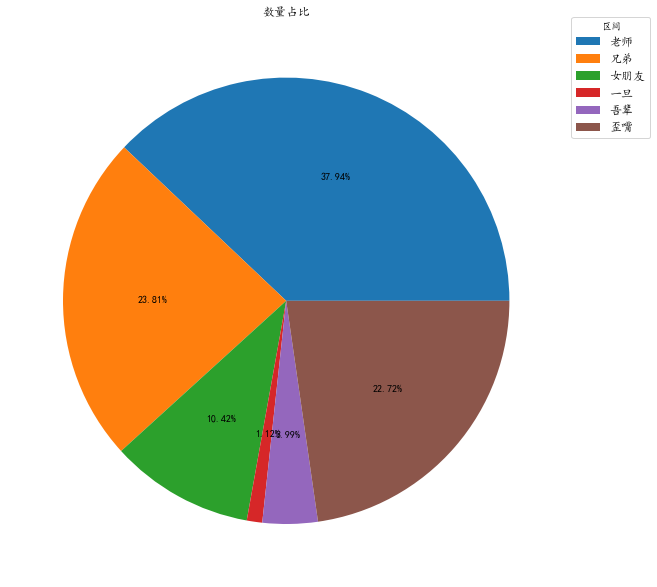

In [44]:
video_rate = [teacher[0],brother[0],girlfriend[0],yidan[0],wubei[0],waizui[0]]
data_view = ['老师','兄弟','女朋友','一旦','吾辈','歪嘴']
fig = plt.figure(figsize=(10,15))
plt.pie(video_rate,autopct='%1.2f%%') #画饼图（数据，数据对应的标签，百分数保留两位小数点）
plt.legend(
           data_view,
           fontsize=12,
           title="区间",
           loc="center left",
           bbox_to_anchor=(1, 0.9))
plt.title("数量占比")
plt.show() 

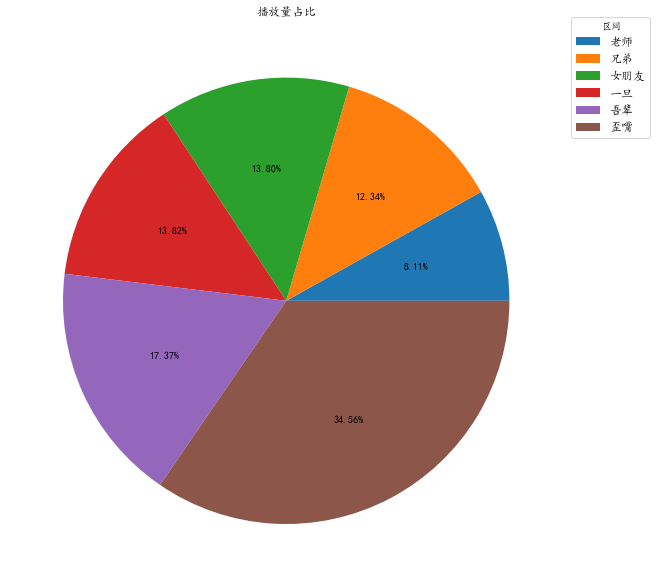

In [45]:
video_rate = [teacher[1],brother[1],girlfriend[1],yidan[1],wubei[1],waizui[1]]
data_view = ['老师','兄弟','女朋友','一旦','吾辈','歪嘴']
fig = plt.figure(figsize=(10,15))
plt.pie(video_rate,autopct='%1.2f%%') #画饼图（数据，数据对应的标签，百分数保留两位小数点）
plt.legend(
           data_view,
           fontsize=12,
           title="区间",
           loc="center left",
           bbox_to_anchor=(1, 0.9))
plt.title("播放量占比")
plt.show() 

In [46]:
video_bijian = video_data[video_data['标签'].str.contains("必剪")]
bijian = [len(video_bijian),video_bijian['播放'].sum()]
video_fun = video_data[video_data['标签'].str.contains("恶作剧")]
fun = [len(video_fun),video_fun['播放'].sum()]
video_tc = video_data[video_data['标签'].str.contains("吐槽")]
tc = [len(video_tc),video_tc['播放'].sum()]
video_beauty = video_data[video_data['标签'].str.contains("美女")]
beauty = [len(video_beauty),video_beauty['播放'].sum()]
video_wezy = video_data[video_data['标签'].str.contains("万恶之源")]
wezy = [len(video_wezy),video_wezy['播放'].sum()]
video_show = video_data[video_data['标签'].str.contains("表演")]
show = [len(video_show),video_show['播放'].sum()]
video_tuwei = video_data[video_data['标签'].str.contains("土味")]
tuwei = [len(video_tuwei),video_tuwei['播放'].sum()]

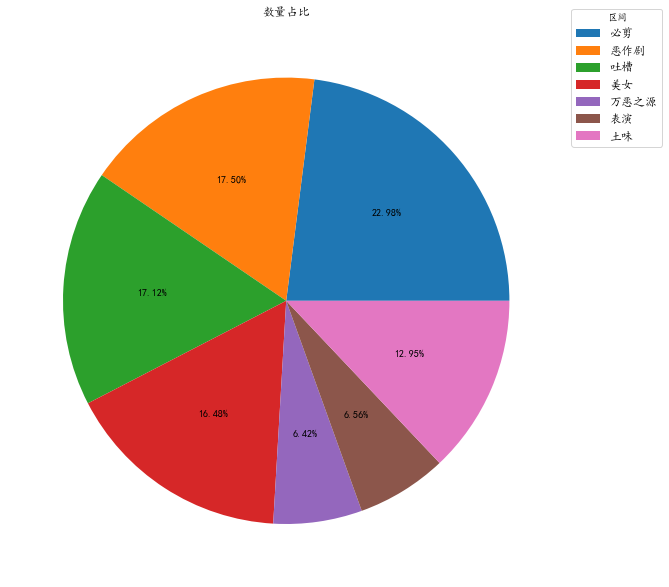

In [47]:
video_rate = [bijian[0],fun[0],tc[0],beauty[0],wezy[0],show[0],tuwei[0]]
data_view = ['必剪','恶作剧','吐槽','美女','万恶之源','表演','土味']
fig = plt.figure(figsize=(10,15))
plt.pie(video_rate,autopct='%1.2f%%') #画饼图（数据，数据对应的标签，百分数保留两位小数点）
plt.legend(
           data_view,
           fontsize=12,
           title="区间",
           loc="center left",
           bbox_to_anchor=(1, 0.9))
plt.title("数量占比")
plt.show() 

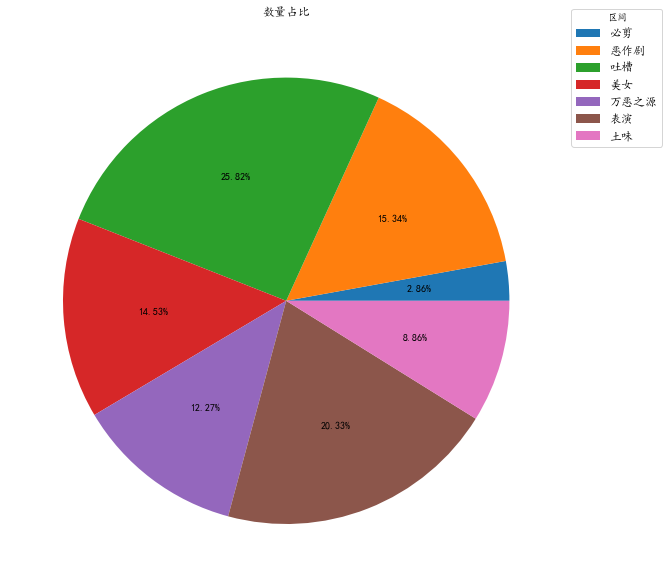

In [48]:
video_rate = [bijian[1],fun[1],tc[1],beauty[1],wezy[1],show[1],tuwei[1]]
data_view = ['必剪','恶作剧','吐槽','美女','万恶之源','表演','土味']
fig = plt.figure(figsize=(10,15))
plt.pie(video_rate,autopct='%1.2f%%') #画饼图（数据，数据对应的标签，百分数保留两位小数点）
plt.legend(
           data_view,
           fontsize=12,
           title="区间",
           loc="center left",
           bbox_to_anchor=(1, 0.9))
plt.title("数量占比")
plt.show() 

In [61]:
# 对大于1万播放量的视频三连率等进行排序
video_rate = video_data[video_data['播放']>10000]
like_20=video_rate.sort_values(by=['点赞率'],ascending=False)[:20]
coin_20=video_rate.sort_values(by=['硬币率'],ascending=False)[:20]
sc_20=video_rate.sort_values(by=['收藏率'],ascending=False)[:20]
share_20=video_rate.sort_values(by=['转发率'],ascending=False)[:20]
danmu_20=video_rate.sort_values(by=['弹幕率'],ascending=False)[:20]
command_20=video_rate.sort_values(by=['评论率'],ascending=False)[:20]

In [56]:
like_20[['标题','播放','UP','点赞','点赞率']]

,标题,播放,UP,点赞,点赞率
12631,不要 暂停 挑战 全程 高能 最后 一个 视频 我 直接 裂开 了,10969,老煎蛋啊,4029,37.0
9049,操场上 当众脱 裤子 盘点 史上 最尬 的 那些 土味 视频,18041,老煎蛋啊,5969,33.0
6067,黑蒜级 不要 笑 挑战 人间 美味 把 小伙 吃 哭 了,38521,流萤Zz,11771,31.0
11309,极致 的 土味 极致 的 享受 我 的 手脚 已 考上 建筑系,12434,菲恩啊啊啊,3309,27.0
1810,你 看 我 还有 救 吗 深度 解密 自 媒体 行业 的 财富 密码,232650,给我一个镜头V,62194,27.0
9891,曝光 上海 漫展 事件 的 最终 真相,15446,贱男春sk,4002,26.0
8868,福禄娃 老大 携 六只 弟弟 卖惨 求职,18776,蛋打撕葱,4824,26.0
4038,沙雕 相声 我要 做 美食,74180,虚拟次元计划,19124,26.0
12987,那些 让 人 笑 到头 掉 的 沙雕 动态图 第期 那 两个 圆圆的 东西 呢,10715,-霁月灵-,2826,26.0
3884,商场 问路 人 请问 你 的 胖次 是 什么 颜色 的 会 怎么样,78642,俺是小熊,20259,26.0


In [58]:
coin_20[['标题','播放','UP','硬币','硬币率']]

,标题,播放,UP,硬币,硬币率
1810,你 看 我 还有 救 吗 深度 解密 自 媒体 行业 的 财富 密码,232650,给我一个镜头V,75302,32.0
4038,沙雕 相声 我要 做 美食,74180,虚拟次元计划,14135,19.0
10149,大象 情侣 蒙眼 画画 挑战,14688,大象ROV,2631,18.0
2342,沙雕 相声 我要 做 吃播,160176,虚拟次元计划,27982,17.0
134,不要 心动 挑战 哥哥 你 眼睛 在 看 哪里 呀 请 务必 看到 最后,1785446,柠檬派奇幻漂流,310118,17.0
3118,带 好 朋友 们 住 进 了 别墅 看 完 就 不会 再白 嫖 了 吧,108489,一介桃白白,14995,14.0
112,提亲 之后 我 送 了 女朋友 一套 别墅 女朋友 都 感动 哭 了,1918451,盖里老哥,277007,14.0
3147,人家 真的 就 只值 这个 价 吗 沙雕 观察,106699,虚拟次元计划,13996,13.0
3598,你们 懂 建国 小天使 的 痛 吗 沙雕 观察,87317,虚拟次元计划,10156,12.0
883,舌战群儒 你 要 投降,456808,B站芳文山,55158,12.0


In [59]:
sc_20[['标题','播放','UP','收藏','收藏率']]

,标题,播放,UP,收藏,收藏率
12687,煎肉 就算 叶叶 天天 和 别人 约 饭 那 又 怎样 我 只要 和 叶叶 关系 好 那 不...,10938,花花プリン,1467,13.0
5208,幻花崽种 进来 教 你 学 字母 超多 盘点 向,49812,院长二二二,5848,12.0
12550,接着 奏乐 接着 舞,11051,慕颜秋yika,1316,12.0
12907,葛葉试 着 弹 了 修羅,10778,秋褲SE7EN,1315,12.0
8560,散人 诱惑 日本 行,20042,无声无色悄无声息,1907,10.0
7998,慎入 原 耽 音乐会 全员 跑调,22967,彤啊活宝,2350,10.0
4874,每天 一遍 烦恼 不见,55142,旗翼夜,5496,10.0
1810,你 看 我 还有 救 吗 深度 解密 自 媒体 行业 的 财富 密码,232650,给我一个镜头V,22186,10.0
8329,潮汕 祭 十周年,21203,老玩哥,1857,9.0
4266,幻花 冷笑 王,68042,zintom,6026,9.0


In [62]:
share_20[['标题','播放','UP','转发','转发率']]

,标题,播放,UP,转发,转发率
12550,接着 奏乐 接着 舞,11051,慕颜秋yika,1348,12.0
2120,闻屁 对 身体 有益 吗,185780,RY热阳,18320,10.0
13412,姨妈 巾 之恋 完整版 三集,10484,花了我6枚硬币改的名,701,7.0
13996,致死量 一杯 咖啡 加 一百倍 奶精 是 什么 感觉 无聊 实验室,10226,无聊实验室,738,7.0
13674,建议 改成 原初 的 解放,10366,迂言鬼,705,7.0
8620,单身 狗 的 无奈,19740,悠哉的神樂,1193,6.0
4936,炜 炜 妹 上线,54188,云小倦,3270,6.0
8551,最强 歪婿 半小时 大 合集,20088,MVPchen,1273,6.0
1245,会 撒娇 的 男人 最好 命,331550,一只王霸天,19860,6.0
11635,郭 老师 放屁 站 最强 的 放屁 视频 大 合集 高音质 屁声 强化,11987,紫咲良17岁,551,5.0


In [63]:
danmu_20[['标题','播放','UP','弹幕','弹幕率']]

,标题,播放,UP,弹幕,弹幕率
12631,不要 暂停 挑战 全程 高能 最后 一个 视频 我 直接 裂开 了,10969,老煎蛋啊,2274,21.0
11309,极致 的 土味 极致 的 享受 我 的 手脚 已 考上 建筑系,12434,菲恩啊啊啊,2096,17.0
276,迷你 世界 被告 上 法庭 玩家 你们 开心 了 吧,1101027,鹿歧leechee,178102,16.0
1175,解锁 土味 新风尚 蜥蜴 精在 召唤 土味 迷惑 大赏,354612,扒妹儿无聊的朋友们,45745,13.0
5057,土味 角虫 奶茶 喷脸 剧情 再度 复刻 这 一次 缝合 三个 剧情 这 女演员 属实 还是...,52249,土味角虫,6555,13.0
10127,堵 上 本命 的 对决 本命 团 歌曲 倒放 后 自家 粉丝 真的 还 能 辨识 出 内涵 ...,14740,小隆包13歲,1778,12.0
9049,操场上 当众脱 裤子 盘点 史上 最尬 的 那些 土味 视频,18041,老煎蛋啊,2181,12.0
12778,七夕 孤寡 不要 酸 挑战 看得 我 狂恰 柠檬 单身 狗 协会 表示 抗议,10868,菲恩啊啊啊,1255,12.0
4900,土味 角虫 年度 催泪 感人 大片 之 城中村 摩 的 佬 的 爱情故事 属实 给 我 看 ...,54791,土味角虫,6422,12.0
4664,不要 暂停 挑战 分 你 必输能 坚持 下来 的 都 是 神人,59125,不想练腿的古龙同学,6893,12.0


In [64]:
command_20[['标题','播放','UP','评论','评论率']]

,标题,播放,UP,评论,评论率
9031,耀 出头首 探 当着 所有 小姐姐 的 面 把 站 掏空 了,18101,荣耀手机,2892,16.0
10815,皓 衣行 魔 改 我 错付 了 我 的 心路历程,13300,我爱上一种蔷薇,840,6.3
7663,经典 再现 鹰角 的 夏活 节奏,24752,Mr_ErrorCode,1543,6.2
13233,好 朋友 因为 肖战 不理 我 四年 友谊 禁不住 这点 考验,10572,#NAME?,622,5.9
5298,这 小伙子 真是 个 人才 呀 乛 乛 网络 上 那些 爆笑 的 沙雕 图 第期,48421,汪の大白,2874,5.9
10455,拿破仑 希特勒,13979,太陽王louisxiv,804,5.8
9891,曝光 上海 漫展 事件 的 最终 真相,15446,贱男春sk,785,5.1
13995,系列 妲 己 苏妲己,10226,上线了广弘,492,4.8
9879,新世纪 战士,15480,Z9NA,729,4.7
11380,公园 整活 王,12331,小明宝儿儿,549,4.5
